In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [2]:
train = pd.read_csv('data/train.csv')

train.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN


In [80]:
# 지역으로 
train_A_1 = train[['id','X01','X02','X04','X05','X11','X12','X13','X00']][:144]
train_A_1 

,id,X01,X02,X04,X05,X11,X12,X13,X00
0,0,988.8,1.2,0.0,1009.3,0.0,82.4,71.3,9.7
1,1,988.9,1.7,0.0,1009.3,0.0,81.2,121.8,9.3
2,2,989.0,1.1,0.0,1009.2,0.0,86.1,232.0,9.4
3,3,988.9,1.5,0.0,1009.2,0.0,87.7,0.0,9.4
4,4,988.9,0.8,0.0,1009.2,0.0,88.9,0.0,9.2
...,...,...,...,...,...,...,...,...,...
139,139,986.7,2.4,0.0,1006.8,30.7,75.8,123.5,12.9
140,140,986.9,1.9,0.0,1006.8,30.7,78.6,153.4,12.8
141,141,986.8,2.9,0.0,1006.8,30.7,79.3,130.5,13.4
142,142,986.8,1.7,0.0,1006.9,30.7,81.0,217.9,13.1


In [81]:
train_A_1 = train_A_1.rename(columns={
    'X01':'AirPressure'
    ,'X02':'WindSpeed'
    ,'X04':'Precipitation'
    ,'X05':'SeaPressure'
    ,'X11':'Insolation'
    ,'X12':'Humidity'
    ,'X13':'WindDirection'
    ,'X00':'target'})
train_A_1

,id,AirPressure,WindSpeed,Precipitation,SeaPressure,Insolation,Humidity,WindDirection,target
0,0,988.8,1.2,0.0,1009.3,0.0,82.4,71.3,9.7
1,1,988.9,1.7,0.0,1009.3,0.0,81.2,121.8,9.3
2,2,989.0,1.1,0.0,1009.2,0.0,86.1,232.0,9.4
3,3,988.9,1.5,0.0,1009.2,0.0,87.7,0.0,9.4
4,4,988.9,0.8,0.0,1009.2,0.0,88.9,0.0,9.2
...,...,...,...,...,...,...,...,...,...
139,139,986.7,2.4,0.0,1006.8,30.7,75.8,123.5,12.9
140,140,986.9,1.9,0.0,1006.8,30.7,78.6,153.4,12.8
141,141,986.8,2.9,0.0,1006.8,30.7,79.3,130.5,13.4
142,142,986.8,1.7,0.0,1006.9,30.7,81.0,217.9,13.1


In [82]:
# 지역으로 7일 비옴 
train_A_7 = train[['id','X01','X02','X04','X05','X11','X12','X13','X00']][144*6:144*7]
train_A_7 = train_A_7.rename(columns={
    'X01':'AirPressure'
    ,'X02':'WindSpeed'
    ,'X04':'Precipitation'
    ,'X05':'SeaPressure'
    ,'X11':'Insolation'
    ,'X12':'Humidity'
    ,'X13':'WindDirection'
    ,'X00':'target'})
train_A_7

,id,AirPressure,WindSpeed,Precipitation,SeaPressure,Insolation,Humidity,WindDirection,target
864,864,992.6,4.3,0.0,1011.6,0.00,62.2,73.3,20.5
865,865,992.4,2.9,0.0,1011.3,0.00,64.2,209.1,20.2
866,866,992.1,2.1,0.0,1011.3,0.00,65.5,198.5,19.9
867,867,991.9,2.4,0.0,1011.0,0.00,61.9,205.7,19.9
868,868,991.7,3.4,0.0,1010.8,0.00,60.5,233.9,19.8
...,...,...,...,...,...,...,...,...,...
1003,1003,988.1,0.8,14.4,1008.5,3.15,79.5,192.5,12.2
1004,1004,988.1,0.0,14.4,1008.5,3.15,80.0,170.6,12.3
1005,1005,988.2,0.7,14.4,1008.4,3.15,81.1,179.7,12.2
1006,1006,988.1,1.5,14.4,1008.5,3.15,80.1,162.6,12.0


In [75]:
# 7 비옴 
train_7day = train[['id','X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][144*6:144*7]
train_7day 

,id,X00,X07,X28,X31,X32,Y00,Y01,Y02,Y03,...,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
864,864,20.5,23.6,24.2,18.3,20.4,23.5,24.0,24.0,27.5,...,23.5,22.0,23.0,22.0,22.5,21.0,21.0,21.0,23.0,20.5
865,865,20.2,23.4,24.1,18.1,20.1,23.5,24.0,23.5,27.5,...,23.5,22.0,23.0,22.0,22.5,21.0,21.0,21.0,23.0,20.5
866,866,19.9,23.1,24.0,17.9,20.0,23.5,23.5,23.5,27.5,...,23.0,21.5,22.5,21.5,22.5,20.5,20.5,20.5,22.0,20.0
867,867,19.9,22.9,23.8,17.9,19.6,23.5,23.5,23.5,27.5,...,22.5,21.0,22.0,21.0,22.0,20.5,20.0,20.0,22.0,19.5
868,868,19.8,22.9,23.7,17.9,19.3,23.0,23.0,23.0,27.0,...,22.0,20.5,21.5,21.0,22.0,20.0,20.0,20.0,21.5,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1003,12.2,14.5,15.1,14.6,13.6,15.0,15.0,14.5,20.0,...,14.5,12.5,14.0,13.5,14.0,13.0,13.0,12.5,13.5,13.0
1004,1004,12.3,14.4,15.0,14.5,13.5,15.0,15.0,14.5,20.0,...,14.5,12.5,13.5,13.5,14.0,13.5,13.0,12.5,14.0,13.0
1005,1005,12.2,14.4,14.8,14.4,13.3,14.5,15.0,14.5,20.0,...,14.5,12.5,13.5,13.5,14.0,13.0,13.0,12.5,14.0,13.0
1006,1006,12.0,14.2,14.8,14.3,13.3,14.5,14.5,14.5,20.0,...,14.5,12.5,13.5,13.0,14.0,13.0,12.5,12.5,13.5,13.0


In [26]:
## 하루치 기온(,'Y18' 제외)
# 대구 전 지역의 하루치 기온 
train_1day = train[['id','X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][:144]
train_1day

,id,X00,X07,X28,X31,X32,Y00,Y01,Y02,Y03,...,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,0,9.7,12.2,12.3,8.2,10.7,12.5,11.5,11.0,20.0,...,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0
1,1,9.3,12.1,12.1,8.3,10.3,12.5,11.0,11.0,20.0,...,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0
2,2,9.4,12.1,12.1,8.0,9.7,12.0,11.0,11.0,19.5,...,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5
3,3,9.4,12.0,12.1,7.7,9.4,12.0,11.0,11.0,19.5,...,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5
4,4,9.2,12.0,12.0,7.4,9.4,12.0,10.5,10.5,19.0,...,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,139,12.9,16.5,16.6,12.1,16.1,17.0,16.0,16.0,22.5,...,14.5,12.0,12.0,12.0,14.5,13.5,13.5,13.5,14.0,12.5
140,140,12.8,16.5,16.5,11.7,16.1,17.0,16.0,16.0,22.5,...,15.0,12.5,12.0,12.0,15.0,13.5,13.5,13.0,14.5,12.5
141,141,13.4,16.3,16.6,11.4,15.8,16.5,16.0,16.0,22.0,...,15.5,13.0,12.5,12.0,15.0,13.5,13.5,13.0,14.5,12.5
142,142,13.1,16.3,16.4,11.0,16.0,16.5,16.0,16.0,22.0,...,15.0,13.0,12.5,12.0,14.5,13.5,13.0,13.0,14.5,12.0


In [28]:
## 하루치 기온(,'Y18' 제외)
# 대구 전 지역의 하루치 기온 
train_2day = train[['id','X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][144:144*2]
train_2day

,id,X00,X07,X28,X31,X32,Y00,Y01,Y02,Y03,...,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
144,144,12.5,16.1,16.2,10.8,15.7,16.5,16.0,15.5,22.0,...,15.0,13.0,12.5,12.0,14.5,13.0,13.0,12.5,14.5,12.0
145,145,12.3,16.1,16.2,10.6,15.5,16.0,15.5,15.5,21.5,...,15.0,12.5,12.5,12.0,14.0,13.5,13.0,12.5,14.0,12.0
146,146,12.1,15.9,16.1,10.3,15.6,16.0,15.5,15.0,21.5,...,14.5,12.0,12.0,11.5,13.5,13.0,13.0,12.5,13.0,12.0
147,147,12.1,15.8,16.0,10.0,15.3,16.0,15.0,14.5,21.5,...,13.5,11.0,11.5,11.0,12.5,13.0,12.5,12.0,12.0,11.5
148,148,11.9,15.7,15.8,9.9,14.9,16.0,14.5,14.5,21.5,...,12.5,10.5,11.0,10.5,12.0,12.5,12.5,12.0,11.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,15.7,19.9,20.4,11.9,13.6,20.5,18.5,18.5,24.5,...,16.0,14.5,15.0,13.5,16.0,16.5,16.5,16.5,14.5,15.0
284,284,15.8,19.7,20.2,12.1,13.1,20.0,18.0,18.0,24.0,...,15.5,14.0,14.5,13.0,15.0,16.5,16.5,16.0,14.0,15.0
285,285,15.6,19.6,20.0,12.0,12.6,20.0,18.0,18.0,24.0,...,15.5,13.5,14.0,13.0,15.0,16.5,16.5,16.0,14.0,15.0
286,286,15.5,19.7,19.7,11.3,12.9,20.0,18.0,17.5,24.0,...,15.0,13.5,14.0,12.5,15.0,16.5,16.5,16.5,14.0,15.0


In [42]:
## 하루치 기온(,'Y18' 제외)
# 대구 전 지역의 하루치 기온 
train_28day = train[['id','X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][144*27:144*28]
train_28day

,id,X00,X07,X28,X31,X32,Y00,Y01,Y02,Y03,...,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
3888,3888,17.9,19.8,20.7,19.5,18.8,20.5,20.5,20.5,25.5,...,19.5,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0
3889,3889,17.7,19.6,20.6,19.3,18.3,20.0,20.5,20.5,25.5,...,19.5,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0
3890,3890,17.6,19.5,20.3,19.0,17.8,20.0,20.0,20.5,25.5,...,19.0,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0
3891,3891,17.6,19.4,20.5,18.8,17.6,20.0,20.0,20.0,25.5,...,19.0,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5
3892,3892,17.0,19.2,20.3,19.0,17.3,19.5,20.0,20.0,25.0,...,19.0,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,4027,18.0,20.8,21.5,18.0,18.0,21.5,21.5,21.5,26.0,...,19.0,17.0,18.0,17.5,18.0,18.5,18.5,18.0,17.5,17.5
4028,4028,17.8,20.8,21.5,18.2,17.8,21.5,21.0,21.5,26.0,...,18.5,17.0,18.0,17.0,18.0,18.0,18.5,17.5,17.5,17.5
4029,4029,18.1,20.7,21.4,17.9,17.8,21.0,20.5,21.0,26.0,...,18.5,17.0,17.5,17.0,18.0,18.0,18.0,17.5,17.5,17.5
4030,4030,17.6,20.6,21.2,17.5,17.6,21.0,20.5,21.0,26.0,...,18.5,16.5,17.5,16.5,17.5,18.0,18.0,17.5,17.0,17.5


In [43]:
## 하루치 기온(,'Y18' 제외)
# 대구 전 지역의 하루치 기온 
train_29day = train[['id','X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][144*28:144*29]
train_29day

,id,X00,X07,X28,X31,X32,Y00,Y01,Y02,Y03,...,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
4032,4032,17.5,20.3,21.2,16.8,17.2,21.0,20.0,20.5,25.5,...,18.0,16.0,16.5,16.0,17.5,17.5,17.5,17.0,16.5,17.0
4033,4033,17.4,20.2,21.2,17.0,16.9,21.0,20.0,20.5,25.5,...,18.0,16.0,16.5,16.0,17.0,17.5,17.5,17.0,16.5,17.0
4034,4034,17.2,20.2,21.2,16.7,16.7,20.5,19.5,20.5,25.5,...,17.5,16.0,16.5,16.0,17.0,17.0,17.0,17.0,16.5,17.0
4035,4035,17.0,20.0,21.1,16.8,16.8,20.5,19.5,20.0,25.0,...,17.5,16.0,16.5,15.5,17.0,17.0,17.0,17.0,16.5,17.0
4036,4036,16.9,20.0,21.2,16.5,16.6,20.5,19.5,20.0,25.0,...,17.5,16.0,16.5,15.5,17.0,17.0,17.0,17.0,16.5,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,4171,19.1,21.1,21.8,17.6,18.9,21.5,21.0,21.0,24.5,...,19.5,18.0,19.0,18.0,19.0,19.0,19.0,19.0,19.0,18.5
4172,4172,19.1,21.0,21.8,17.7,19.0,21.0,20.5,20.5,24.5,...,19.5,18.0,19.0,18.0,19.0,19.0,19.0,19.0,18.5,18.0
4173,4173,19.6,21.0,21.7,17.9,19.0,21.0,20.5,20.5,24.0,...,19.0,17.5,18.5,17.5,19.0,19.0,19.0,18.5,18.5,18.0
4174,4174,19.5,20.9,21.7,17.9,18.9,21.0,20.5,20.5,24.0,...,19.0,18.0,18.5,17.5,18.5,19.0,19.0,18.5,18.5,18.0


In [44]:
## 하루치 기온(,'Y18' 제외)
# 대구 전 지역의 하루치 기온 
train_30day = train[['id','X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][144*29:144*30]
train_30day

,id,X00,X07,X28,X31,X32,Y00,Y01,Y02,Y03,...,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
4176,4176,19.7,20.8,21.3,18.0,19.2,21.0,20.0,20.5,24.0,...,19.0,18.0,18.5,17.5,19.0,19.0,18.5,18.5,19.0,18.0
4177,4177,19.5,20.7,21.1,18.0,19.1,21.0,20.0,20.5,24.0,...,19.5,18.0,18.5,17.5,19.0,19.0,18.5,18.5,19.0,18.5
4178,4178,19.4,20.7,20.8,18.0,18.9,21.0,20.0,20.5,24.0,...,19.5,18.0,18.5,17.5,19.0,19.0,18.5,18.5,19.0,18.5
4179,4179,19.3,20.7,20.7,18.0,18.4,21.0,20.0,20.0,24.0,...,19.0,18.0,18.5,17.5,19.0,19.0,19.0,18.5,18.5,18.0
4180,4180,19.3,20.6,20.8,18.0,18.3,21.0,20.0,20.0,23.5,...,19.0,17.5,18.5,17.5,18.5,19.0,18.5,18.5,18.5,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,4315,19.5,21.3,21.6,18.8,19.4,22.0,22.5,22.5,26.0,...,20.5,19.5,20.0,19.0,20.5,20.5,20.0,20.0,20.5,20.0
4316,4316,19.3,21.3,21.6,18.6,18.5,22.0,22.5,22.5,26.0,...,20.5,19.5,20.0,19.0,20.5,20.5,20.0,19.5,20.5,19.5
4317,4317,19.5,21.2,21.5,18.4,19.1,21.5,22.5,22.5,26.0,...,20.5,19.5,20.0,19.0,20.0,20.0,19.5,19.5,20.0,19.0
4318,4318,20.0,21.1,21.3,18.2,19.0,21.5,22.0,22.0,25.5,...,20.0,19.5,20.0,18.5,20.0,20.0,19.5,19.5,20.0,19.0


,id,X00,X07,X28,X31,X32,Y18
864,864,20.5,23.6,24.2,18.3,20.4,NaN
865,865,20.2,23.4,24.1,18.1,20.1,NaN
866,866,19.9,23.1,24.0,17.9,20.0,NaN
867,867,19.9,22.9,23.8,17.9,19.6,NaN
868,868,19.8,22.9,23.7,17.9,19.3,NaN
...,...,...,...,...,...,...,...
1003,1003,12.2,14.5,15.1,14.6,13.6,NaN
1004,1004,12.3,14.4,15.0,14.5,13.5,NaN
1005,1005,12.2,14.4,14.8,14.4,13.3,NaN
1006,1006,12.0,14.2,14.8,14.3,13.3,NaN


In [34]:
# 31 
train_31day = train[['id','X00', 'X07', 'X28', 'X31', 'X32','Y18']][144*30:144*31]
train_31day

,id,X00,X07,X28,X31,X32,Y18
4320,4320,19.3,20.8,21.0,18.0,18.7,20.5
4321,4321,19.0,20.6,20.7,17.7,19.0,20.5
4322,4322,19.1,20.5,20.7,17.4,19.2,20.5
4323,4323,19.2,20.5,20.6,17.5,19.3,20.5
4324,4324,19.2,20.5,20.5,17.4,19.5,20.5
...,...,...,...,...,...,...,...
4459,4459,20.9,22.9,22.2,20.9,21.5,22.0
4460,4460,21.0,22.7,22.1,20.3,21.3,22.0
4461,4461,20.9,22.6,22.0,20.6,21.2,22.0
4462,4462,20.6,22.6,21.7,20.1,21.0,22.0


In [35]:
# 32
train_32day = train[['id','X00', 'X07', 'X28', 'X31', 'X32','Y18']][144*31:144*32]
train_32day

,id,X00,X07,X28,X31,X32,Y18
4464,4464,20.3,22.4,21.6,20.7,20.7,22.0
4465,4465,20.2,22.3,21.6,20.5,20.6,22.0
4466,4466,20.2,22.3,21.6,20.2,20.5,22.0
4467,4467,20.0,22.3,21.6,20.3,20.4,21.5
4468,4468,19.8,22.3,21.4,20.2,20.4,21.5
...,...,...,...,...,...,...,...
4603,4603,20.3,21.9,22.0,20.1,19.8,22.0
4604,4604,20.3,21.7,21.8,20.1,19.6,21.5
4605,4605,19.9,21.7,21.7,19.8,19.5,21.5
4606,4606,19.7,21.6,21.7,19.6,19.5,21.5


In [36]:
# 33 
train_33day = train[['id','X00', 'X07', 'X28', 'X31', 'X32','Y18']][144*32:144*33]
train_33day

,id,X00,X07,X28,X31,X32,Y18
4608,4608,20.4,21.3,21.6,19.9,19.3,21.5
4609,4609,20.4,21.2,21.6,19.7,19.0,21.5
4610,4610,20.4,21.2,21.6,19.3,19.1,21.5
4611,4611,20.5,21.1,21.5,19.0,19.4,21.0
4612,4612,20.6,21.1,21.5,19.0,19.3,21.0
...,...,...,...,...,...,...,...
4747,4747,19.9,21.7,23.8,17.7,19.1,21.5
4748,4748,19.9,21.6,23.6,17.7,19.2,21.5
4749,4749,19.7,21.4,23.6,17.8,19.2,21.5
4750,4750,19.4,21.3,23.3,17.7,19.3,21.5


**[컬럼 설명]**

### 데이터 분석하기

In [64]:
print('[shape]\t',train_A.shape)
print('\n[info]\n')
train_A.info()

[shape]	 (144, 8)

[info]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
현지기압       144 non-null float64
풍속         144 non-null float64
일일누적강수량    144 non-null float64
해면기압       144 non-null float64
일일누적일사량    144 non-null float64
습도         144 non-null float64
풍향         144 non-null float64
target     144 non-null float64
dtypes: float64(8)
memory usage: 9.1 KB


In [20]:
print('[shape]\t',train_1day.shape)
print('\n[info]\n')
train_1day.info()

[shape]	 (144, 24)

[info]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 24 columns):
id     144 non-null int64
X00    144 non-null float64
X07    144 non-null float64
X28    144 non-null float64
X31    144 non-null float64
X32    144 non-null float64
Y00    144 non-null float64
Y01    144 non-null float64
Y02    144 non-null float64
Y03    144 non-null float64
Y04    144 non-null float64
Y05    144 non-null float64
Y06    144 non-null float64
Y07    144 non-null float64
Y08    144 non-null float64
Y09    144 non-null float64
Y10    144 non-null float64
Y11    144 non-null float64
Y12    144 non-null float64
Y13    144 non-null float64
Y14    144 non-null float64
Y15    144 non-null float64
Y16    144 non-null float64
Y17    144 non-null float64
dtypes: float64(23), int64(1)
memory usage: 27.1 KB


* 컬럼 타입
* null check
* object 타입 - category 컬럼 확인 => 숫자형 변환

In [21]:
print('\n전체 feature 들의 type \n',train_1day.dtypes.value_counts())


전체 feature 들의 type 
 float64    23
int64       1
dtype: int64


In [65]:
train_A.describe()

,현지기압,풍속,일일누적강수량,해면기압,일일누적일사량,습도,풍향,target
count,144.000000,144.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000
mean,986.829167,2.610417,0.0,1006.732639,14.645972,59.593750,156.377083,15.938194
std,1.479268,1.123165,0.0,1.707238,13.103706,27.655142,90.076053,5.651474
min,984.500000,0.400000,0.0,1004.200000,0.000000,22.200000,0.000000,8.300000
25%,985.575000,1.775000,0.0,1005.100000,0.040000,33.275000,118.050000,9.375000
50%,986.750000,2.500000,0.0,1006.600000,13.300000,58.950000,149.600000,15.050000
75%,988.300000,3.300000,0.0,1008.525000,30.057500,90.325000,210.200000,21.725000
max,989.000000,6.700000,0.0,1009.400000,30.700000,96.800000,359.100000,24.300000


In [ ]:
# train_1day 대구 전 지역의 하루치 기온 ->  null 없고, 23개 지역의 기온, 모두 숫자형, 시계열 

In [22]:
train_1day.describe()

,id,X00,X07,X28,X31,X32,Y00,Y01,Y02,Y03,...,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.00000,144.000000,144.000000,144.000000
mean,71.500000,15.938194,17.679861,17.801389,14.962500,15.740972,17.326389,18.923611,18.927083,21.069444,...,20.138889,17.159722,17.687500,19.715278,19.430556,17.048611,18.06250,17.305556,18.375000,19.336806
std,41.713307,5.651474,4.626476,5.146538,6.826613,6.064806,4.565115,8.418744,8.327847,3.536825,...,11.655672,10.216306,10.905647,13.565517,9.299901,7.533914,9.15654,8.137823,8.962919,10.563632
min,0.000000,8.300000,11.600000,10.300000,5.300000,5.500000,11.500000,7.000000,7.000000,16.000000,...,7.000000,3.500000,4.000000,3.000000,6.000000,7.500000,7.50000,7.000000,6.000000,7.000000
25%,35.750000,9.375000,12.175000,12.000000,7.375000,9.075000,12.000000,10.000000,10.000000,17.500000,...,9.000000,6.000000,6.000000,5.500000,9.000000,9.375000,9.00000,8.500000,7.500000,8.500000
50%,71.500000,15.050000,17.450000,18.150000,14.950000,16.950000,17.500000,18.750000,19.250000,21.250000,...,17.500000,16.250000,16.000000,17.500000,20.750000,15.500000,15.25000,15.500000,18.000000,15.000000
75%,107.250000,21.725000,22.175000,22.625000,22.000000,21.225000,21.625000,27.625000,27.500000,24.500000,...,27.250000,28.000000,29.000000,33.250000,26.500000,23.500000,26.62500,24.500000,26.000000,31.625000
max,143.000000,24.300000,24.700000,25.300000,24.100000,23.500000,24.000000,31.000000,30.500000,26.500000,...,45.000000,31.000000,34.000000,41.000000,35.000000,30.500000,35.50000,32.500000,34.000000,34.000000


* ! 숫자형(int, float) 컬럼만 조사 
* 컬럼별 분포 파악 - 왜곡, 이상치
* max == count 라면, id 같은 숫자형 카테코리 컬럼일 가능성이 높음(삭제 대상)

**데이터 분포 확인**

### EDA

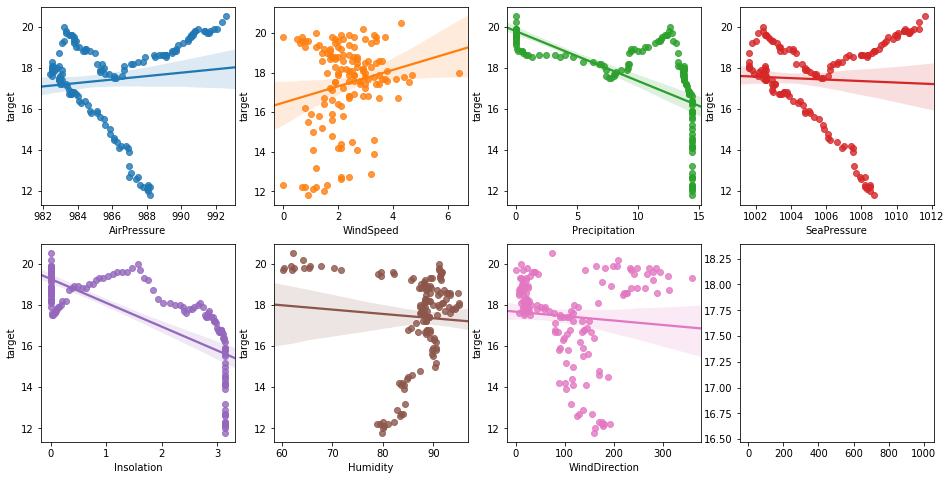

In [78]:
# A 지역 7일 비옴 

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['AirPressure','WindSpeed','Precipitation','SeaPressure','Insolation','Humidity','WindDirection']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='target', data=train_A_7 , ax=axs[row][col])

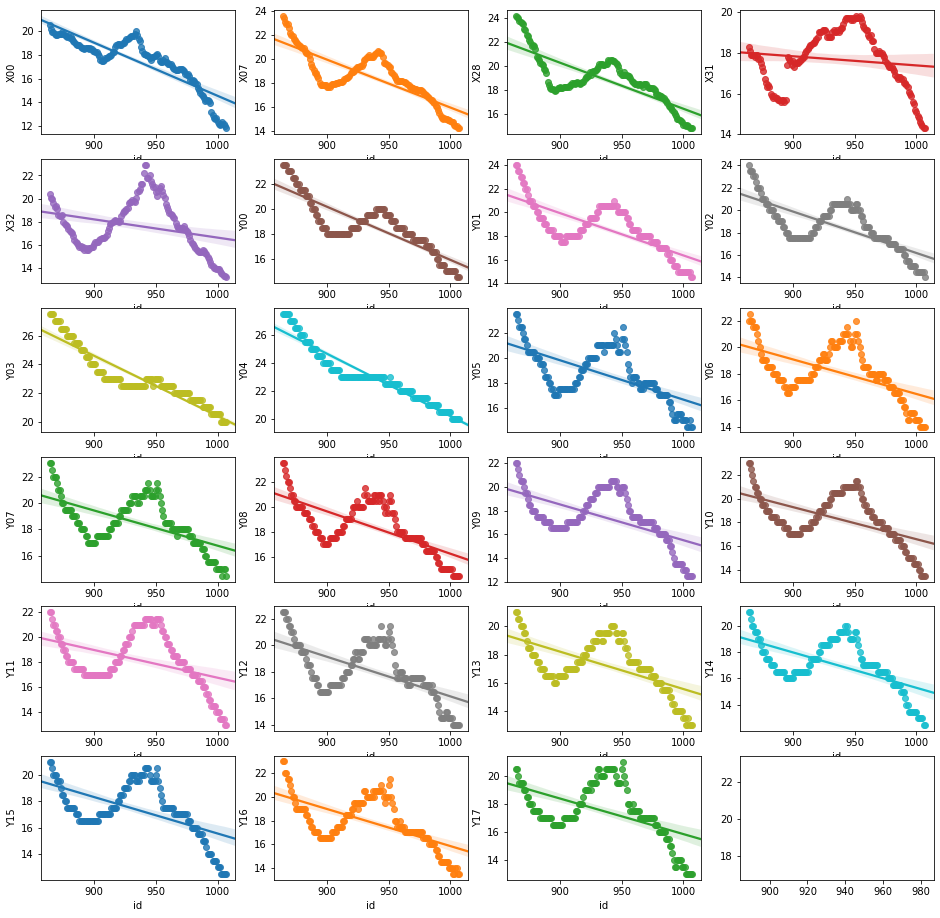

In [76]:
# train_7day

fig, axs = plt.subplots(figsize=(16,16) , ncols=4 , nrows=6)
lm_features = ['X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x='id' , y=feature, data=train_7day , ax=axs[row][col])

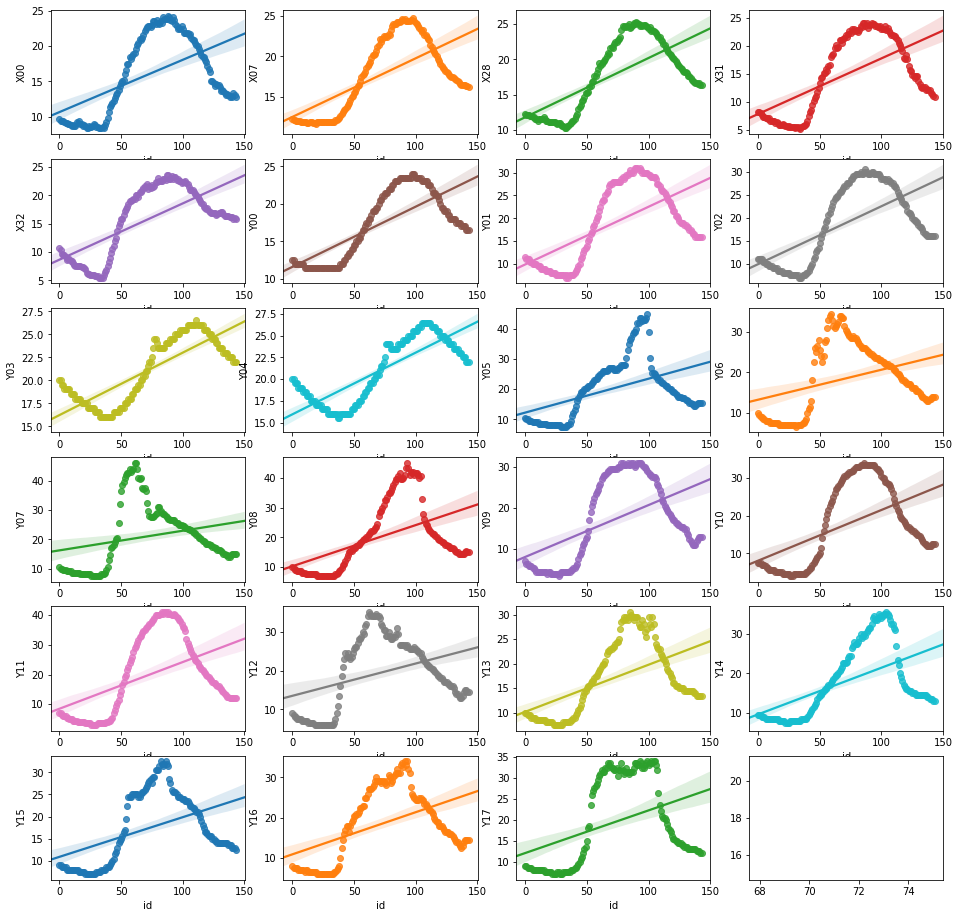

In [31]:
# train_1day = train[['id','X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][:144]


# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,16) , ncols=4 , nrows=6)
lm_features = ['X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x='id' , y=feature, data=train_1day , ax=axs[row][col])

시간별로  패턴 존재 

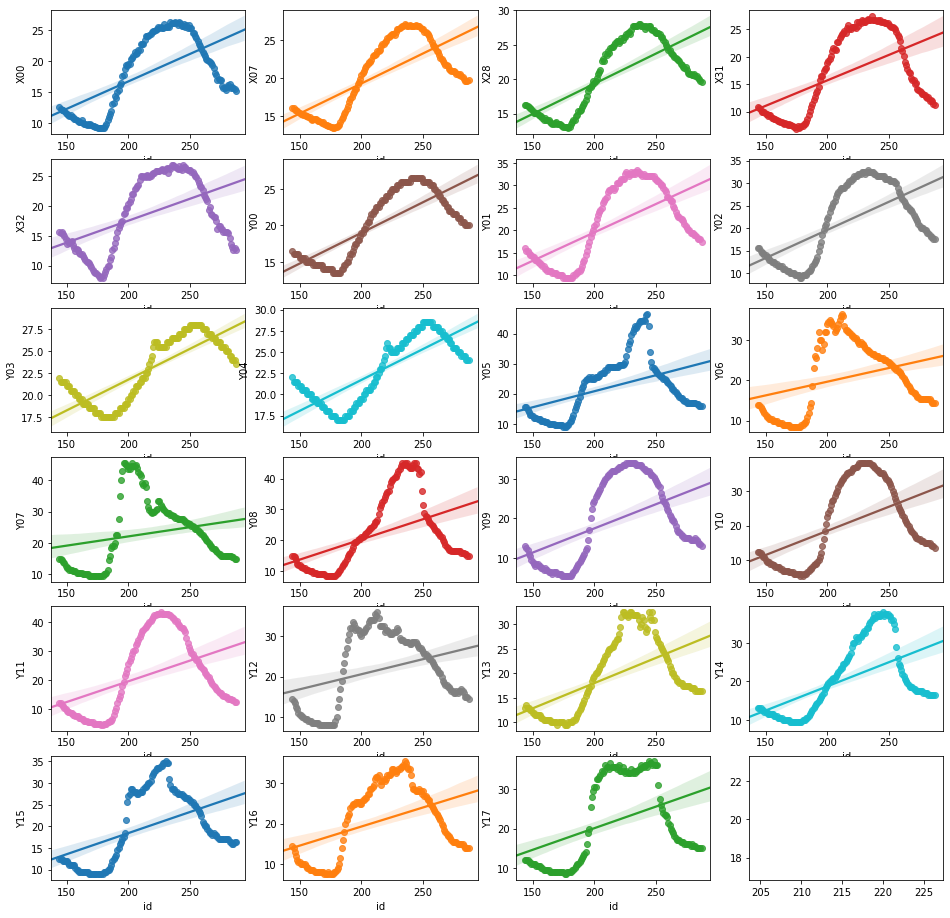

In [32]:
# train_1day = train[['id','X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][:144]


# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,16) , ncols=4 , nrows=6)
lm_features = ['X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x='id' , y=feature, data=train_2day , ax=axs[row][col])

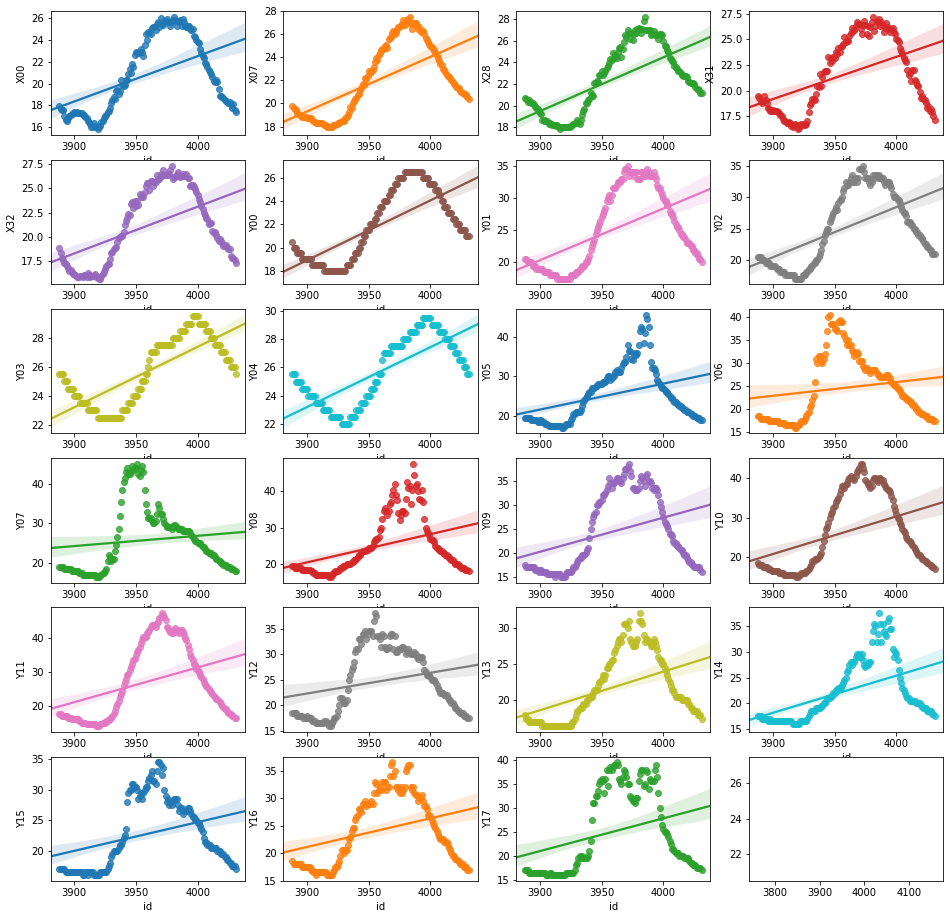

In [45]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,16) , ncols=4 , nrows=6)
lm_features = ['X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x='id' , y=feature, data=train_28day , ax=axs[row][col])

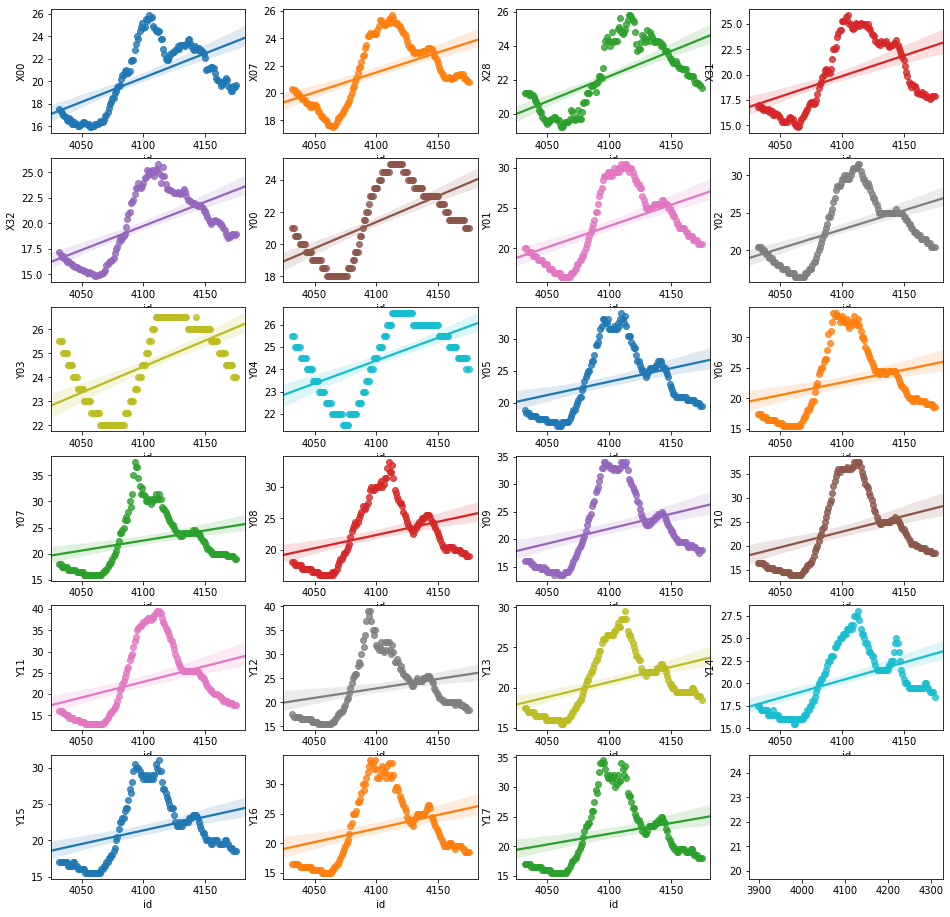

In [46]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,16) , ncols=4 , nrows=6)
lm_features = ['X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x='id' , y=feature, data=train_29day , ax=axs[row][col])

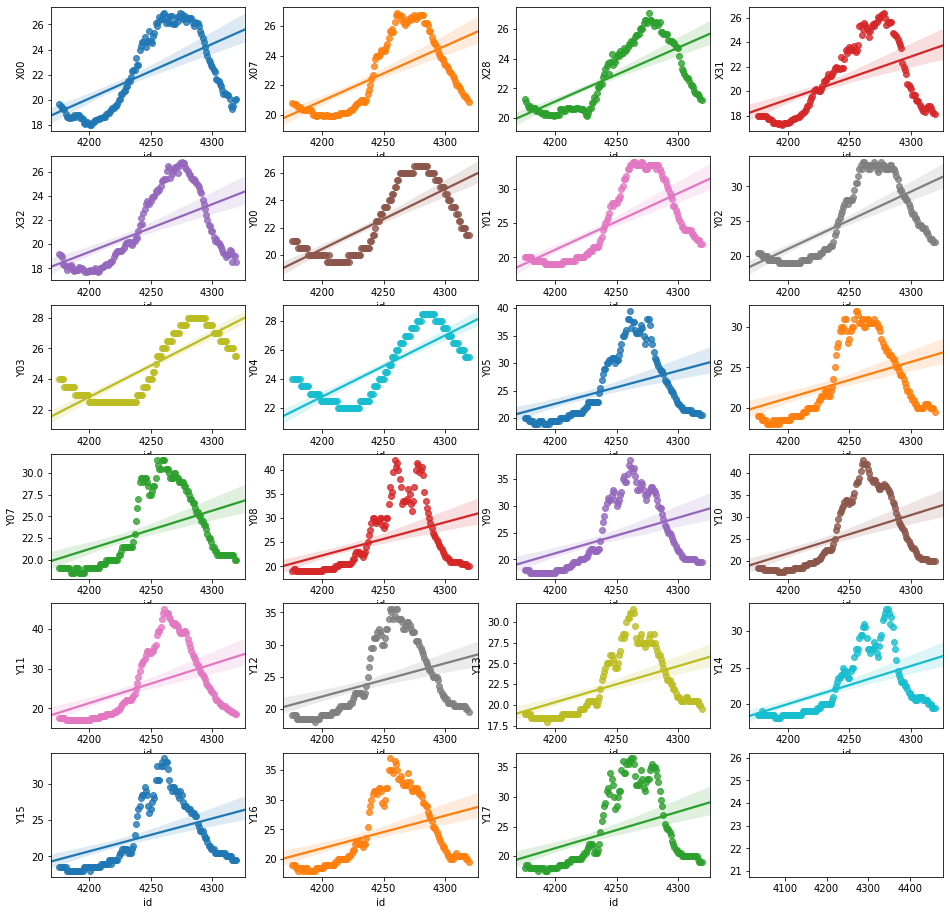

In [47]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,16) , ncols=4 , nrows=6)
lm_features = ['X00', 'X07', 'X28', 'X31', 'X32', 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x='id' , y=feature, data=train_30day , ax=axs[row][col])

In [ ]:
# train_33day = train[['id','X00', 'X07', 'X28', 'X31', 'X32','Y18']][144*32:144*33]

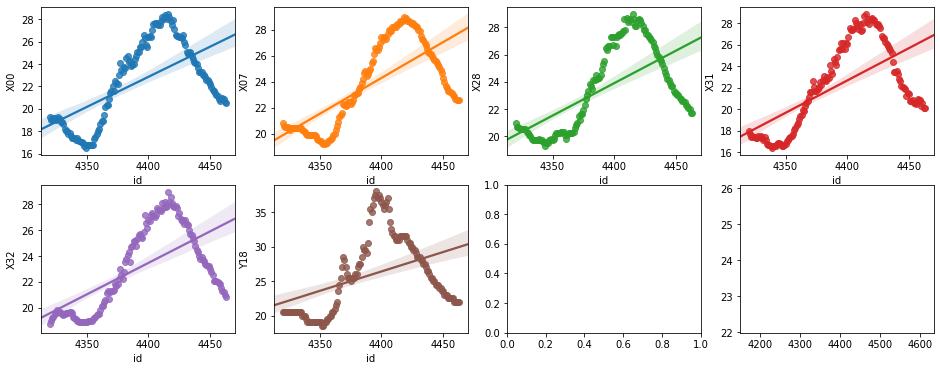

In [39]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,6) , ncols=4 , nrows=2)
lm_features = ['X00', 'X07', 'X28', 'X31', 'X32','Y18']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x='id' , y=feature, data=train_31day , ax=axs[row][col])

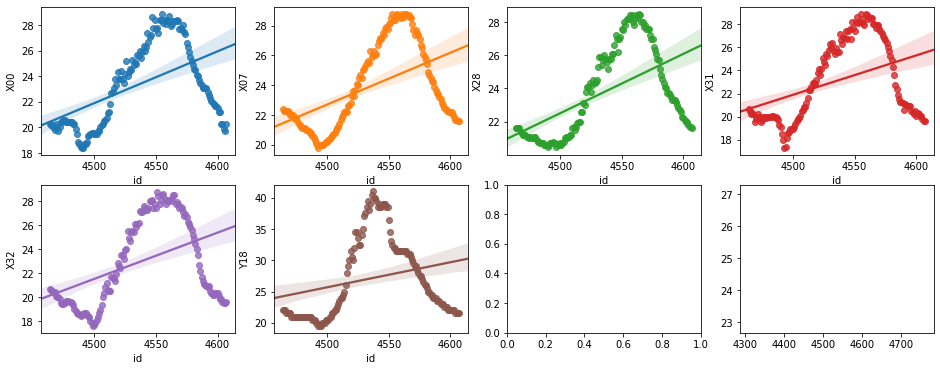

In [40]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,6) , ncols=4 , nrows=2)
lm_features = ['X00', 'X07', 'X28', 'X31', 'X32','Y18']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x='id' , y=feature, data=train_32day , ax=axs[row][col])

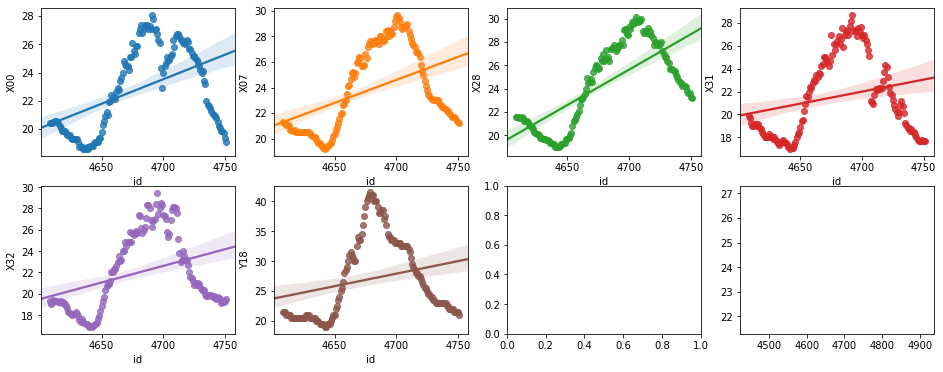

In [41]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,6) , ncols=4 , nrows=2)
lm_features = ['X00', 'X07', 'X28', 'X31', 'X32','Y18']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x='id' , y=feature, data=train_33day , ax=axs[row][col])

### 이상치

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    
    fraud = df[column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [ ]:
print(train.shape, target.shape)

In [ ]:
outlier_index = get_outlier(df=train, column='PTRATIO', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)
train.drop(outlier_index, axis=0, inplace=True)
target.drop(outlier_index, axis=0, inplace=True)

print(train.shape, target.shape)

### 카테고리 타입 -> 변환 대상 

In [ ]:
# 컬럼 명 변경 

# data_df_reset.rename(columns={'index':'old_index'})

# Dataframe.drop(labels=None, axis=1, inplace=False) #  axis=0 : col 삭제

컬럼 데이터 세트 생성/수정/삭제 

In [ ]:
"""
# 조작 
train['NOX'] = train['NOX'].str[:1]
train['NOX'].value_counts()
"""

# 전처리
* 1. 스케일링과 정규화(StandardScaler, MinMaxScaler)
* 2. 1번으로 향상 없을 시, 다항 적용(PolynomialFeatures)
* 3. 1,2 보다 많이 사용되는 **로그 변환**

### 왜곡
* target 왜곡

In [ ]:
plt.hist(target, bins=10)

왜곡 시 log 변환 

In [ ]:
target = np.log1p(target)
target.hist()

왜곡 log -> 지수 변환 

In [ ]:
target = np.expm1(target)
target.hist()

* train 왜곡

In [ ]:
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = train.dtypes[train.dtypes != 'object'].index

# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = train[features_index].apply(lambda x : skew(x))

# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

In [ ]:
# 왜곡도가 1인 피처들은 로그 변환 적용하고 다시 하이퍼 파라미터 튜닝 후 재 학습/예측/평가
train[skew_features_top.index] = np.log1p(train[skew_features_top.index])

In [ ]:
train.head()

### 선형 회귀 모델을 위한 데이터 변환

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=train)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    
    #get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
    #                    y_target_n=train, verbose=False)

### 인코딩
* 원-핫 인코딩(One-Hot encoding)

In [ ]:
train = pd.get_dummies(train)
train.head(3)
print(train.shape, target.shape)

In [ ]:
plt.figure(figsize=(9, 9))
corr = train.corr()
sns.heatmap(corr, cmap='RdBu')

* ! 모두 숫자형으로 변환이 완료 되었는가?

# 학습

### 학습 데이터와 테스트 데이터 세트로 분리

In [ ]:
# 데이터에서 결정자 삭제 
train.drop('PRICE', axis=1, inplace=True)

In [ ]:
print(train.shape, target.shape)

In [ ]:
# LogisticRegression 는 스케일링 적용하고 train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
train = scaler.fit_transform(train)
train = pd.DataFrame(train , columns = boston.feature_names)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train , target ,test_size=0.3, shuffle=True, random_state=156)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

### SMOTE 오버 샘플링

In [ ]:
"""
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())
"""

### 모델 학습
* LinearRegression: RSS(Residual Sum of Squares) 최소화해 OLS(Ordinary Least Squares) 추정방식
* LogisticRegression: 정규 분포에 영향 받으므로 스케일링 적용 후 적용
    * 선형 회귀 기반 + 시그모이드 함수
    * 분류, 희소

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
li_reg = LinearRegression(
    fit_intercept=True, # 절편값 계산, False: 절편 사용되지 않고 0 
    normalize=False, # fit_intercept=True 일때만 사용, 회귀 수행 전 정규화 수행
    copy_X=True,
    n_jobs=None,
)

lo_reg = LogisticRegression()

rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)

gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

### fit

In [ ]:
li_reg.fit(X_train ,y_train)
#lo_reg.fit(X_train ,y_train.astype('int'))
#rf_reg.fit(X_train ,y_train)

### predict

In [ ]:
y_preds = li_reg.predict(X_test)
#y_preds = lo_reg.predict(X_test)
#y_preds = rf_reg.predict(X_test)

In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_train, y_train)

LinearRegression max_depth 변경할 때 시각화 

In [ ]:
# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test_reshape = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = train['RM'].values.reshape(-1,1)
y_target = target.values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test_reshape)
pred_rf2 = rf_reg2.predict(X_test_reshape)
pred_rf7 = rf_reg7.predict(X_test_reshape)

fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(train.RM, target, c="darkorange")
ax1.plot(X_test_reshape, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(train.RM, target, c="darkorange")
ax2.plot(X_test_reshape, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(train.RM, target, c="darkorange")
ax3.plot(X_test_reshape, pred_rf7, label="max_depth:7", linewidth=2)

# 평가
* 회귀: Mean(오차(실제값 - 예측값)) : 오차 평균에 기반 
* 분류: 일반적으로 오차에 기반 + **성능 평가 지표**
    * **이진분류:** 정확도 << 성능 평가 지표
    
### 평가 지표
* MAE(Mean Absolute Error): 차이 절댓값 평균
* MSE(Mean Sqared Error): 차이 제곱 평균
    * MSLE(MS Log Error): 로그 MSE
* RMSE(Root MSE): 루트 MSE
    * RMSLE(RMS Log Error) 로그 RMSE
* R^2: 분산 기반, 실제값고 분산 대비 예측 값의 분산비율, 1에 가까울수록 정확

### 평가 방법

In [ ]:
col_name = ["평가방법","사이킷런 평가 지표 API","Scoring 함수 적용 값"]
arr_method = [ ["MAE", "metric.mean_absolute_error","neg_mean_absolute_error"]
              ,["MSE", "metric.mean_squared_error","neg_mean_squared_error"]
              ,["R^2", "metric.r2_score","r2"]]
pd.DataFrame(arr_method, columns=col_name)

**neg_: -1 * metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [ ]:
# log 값 변환 시 언더플로우 영향으로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def mse(y,pred):
    return mean_squared_error(y,pred)

# 책에서는 mean_absolute_error()를 MSE로 잘못 기재함. 
# MAE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mse_val = mse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}, MSE: {3:.3F}'.format(rmsle_val, rmse_val, mae_val, mse_val))

In [ ]:
evaluate_regr(y_test, y_preds)

오류값이 큰 순으로 5개 확인 

In [ ]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,y_preds,n_tops=5)

**선형회귀**

In [ ]:
# Regressor 클래스에는 없음 

print('절편 값:',li_reg.intercept_)
print('회귀 계수값:', np.round(li_reg.coef_, 1))

In [ ]:
# coef_ 는 회귀 계수 값만 가지므로 피처와 매핑해서 내림차순 정렬

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(li_reg.coef_, 1), index=X_train.columns )
coeff.sort_values(ascending=False)

**회귀 트리는 선형 회귀의 회귀 계수 대신, 피처 중요도로 피처의 상대적 중요도를 알 수 있음**

In [ ]:

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_train, y_train)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_train.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)


### GridSearchCV = 교차 검증 + 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lo_reg, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(train, target.astype(int))
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

### 교차검증
**cross_val_score = KFold/StratifiedKFold + train_test_split + fit/predict/evaluation**

In [ ]:
# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(li_reg, train, target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


## 규제

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Ridge Regression

In [ ]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

In [ ]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()



In [ ]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

### 라쏘

In [ ]:
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_train , y_train)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=train.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_train, y_target_n=y_train)

In [ ]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

### 엘라스틱넷 회귀

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_train, y_target_n=y_train)

In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

### 다항 회귀

In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

In [ ]:
X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

### 스태킹

In [ ]:
# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [ ]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

In [ ]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)